In [1]:
import numpy as np

In [2]:
def init_pop_bin(npop,clen):
    return np.random.randint(0,2,(npop,clen))

In [13]:
def one_max_i(cromosom):
    return sum(cromosom)

In [14]:
def one_max_pop(pop):
    x=np.zeros(pop.shape[0])
    for i in range(len(pop)):
        x[i]=one_max_i(pop[i])
    return x

In [15]:
def selection_prop(pop_fitness):
    return pop_fitness/np.sum(pop_fitness)

In [16]:
def cummprob(sprop):
    i=len(sprop)-1
    cumm=np.zeros(sprop.shape)
    while i >= 0:
        cumm[i]=np.sum(sprop[0:i+1])
        i-=1
    return cumm

In [17]:
def R_wheel(cummprop):
    r=np.random.rand()
    for i in range(len(cummprop)):
        if r<=cummprop[i]:
            return i

In [18]:
def rulet_selection(cummprop,pop):
    parents=np.zeros((2,pop.shape[1]))
    indexs=[]
    for i in range(2):
        index=R_wheel(cummprop)
        parents[i]=pop[index]
        indexs.append(index)
    return parents ,indexs

In [19]:
def binary_cross_over(tps,pcross):
    tow_childrens=np.zeros(tps.shape)
    if pcross<=0.7:
        cross_point=np.random.randint(1,tps.shape[1]-1)
        tow_childrens[0][0:cross_point]=tps[0][0:cross_point]
        tow_childrens[0][cross_point:]=tps[1][cross_point:]
        tow_childrens[1][0:cross_point]=tps[1][0:cross_point]
        tow_childrens[1][cross_point:]=tps[0][cross_point:]
    return tow_childrens
   
    

In [20]:
def bin_mute(cromosom,pmute):
    for i in range(len(cromosom)):
        if np.random.rand() <=pmute:
            if cromosom[i]==0:
                cromosom[i]=1
            else:
                cromosom[i]=0
        return cromosom

In [21]:
def runBinGA(npop,clen,ngen,pcross,pmute):
    #intialize population 
    pop=init_pop_bin(npop,clen)
    highstfit=[]
    for i in range(ngen):
        pop_fitness= one_max_pop(pop)
        sprop= selection_prop(pop_fitness)
        cmmprop= cummprob(sprop)
        tow_parents , indexs_in_pop= rulet_selection(cmmprop,pop)
        new_cheldrins=binary_cross_over(tow_parents,pcross)
        for j in range(len(new_cheldrins)):
            new_cheldrins[j]= bin_mute(new_cheldrins[j],pmute)
        pop[indexs_in_pop[0]]=new_cheldrins[0]
        pop[indexs_in_pop[1]]=new_cheldrins[1]
        highstfit.append(np.max(pop_fitness))
    return pop,highstfit
            


In [29]:
finpop,besthist=runBinGA(30,10,50,0.7,0.01)

In [30]:
besthist

[8.0,
 8.0,
 8.0,
 9.0,
 9.0,
 9.0,
 9.0,
 7.0,
 7.0,
 7.0,
 7.0,
 7.0,
 7.0,
 7.0,
 7.0,
 7.0,
 8.0,
 8.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0]

In [31]:
import matplotlib.pyplot as plt

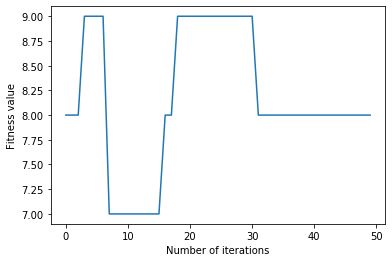

In [32]:
plt.plot(besthist)
plt.ylabel('Fitness value')
plt.xlabel('Number of iterations')
plt.show()